# 프로젝트 : 인물사진을 만들어 보자

**이미지를 다루는 기술은 공간 사고 능력이 뛰어나야 하는 것 같습니다.  
아직까진 경험 덕분에 큰 무리는 없지만 또 라이브러리 기능을 놓치고 생고생을 할까봐 걱정이네요.**

## 1. 인물 사진 적용하기
- **이미지와 모델 준비하기**
- **이미지 레이블 분류하기**
- **마스크 추출하기**
- **블러 효과 입히기**

## 2. 인물 사진 함수 만들기

## 3. 사진에서 문제점 찾기

## 4. 문제점의 솔루션 제안하기

In [1]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 7, 7 # 그래프 기본 사이즈 (7, 7)

어김없이 필요한 모듈을 불러오면서 시작해줍시다.

슬슬 모듈을 먼저 불러오고 시작하는 게 관례가 될 것 같네요.

- - -
### 1. 인물 사진 적용하기
- **이미지와 모델 준비하기**

(540, 960, 3)


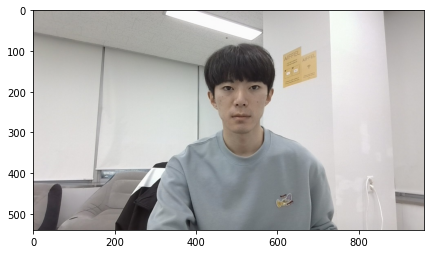

In [2]:
img_path = os.getenv('HOME') + '/aiffel/EXPLORATION/img/WIN_20221014_17_38_29_Pro.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

첫 시도는 역시 제 사진으로 해야겠죠.

In [3]:
model_dir = os.getenv('HOME') + '/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f414f291640>)

`urllib`을 이용해 url 주소를 타서 다운로드 받은 모델을 `/aiffel/human_segmentation/models` 경로에 파일로 생성해줍니다.

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

- - -
### 1. 인물 사진 적용하기
- **이미지 레이블 분류하기**

다운로드했던 학습된 모델의 의미적 분류용 `segmentAsPascalvoc`를 사용하겠습니다.

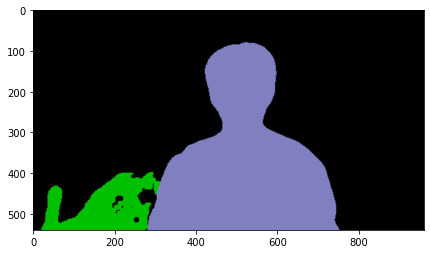

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

준비된 모델로 이렇게 손쉽게 사진 속 물체를 분류했습니다.

보라색은 당연히 사람 레이블을 가진 제가 되겠구요.

초록색이 뭔지는 딱 봐서 감이 잡히지 않는데 확인하는 방법이 있습니다.

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

레이블 종류입니다. 총 21개가 있습니다.

In [7]:
segvalues

{'class_ids': array([ 0, 15, 18]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

클래스와 마스크의 정보를 불러올 수 있습니다.

이 중 봐야할 것은 `class_ids`입니다.

In [8]:
for class_id in segvalues['class_ids']:
    print(class_id, LABEL_NAMES[class_id])

0 background
15 person
18 sofa


0은 배경 레이블, 15는 사람, 18은 소파 레이블을 뜻합니다.

사진 속 녹색 처리된 부분은 소파라고 인식한 부분이였습니다.

정말 맞을까요?

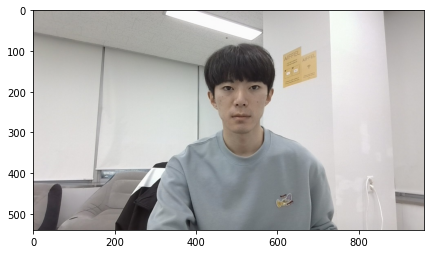

In [9]:
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

소파까지는 아닌 것 같지만 굉장히 유사하게 예측해냈습니다.

사실 소파는 아닌데 뭐라 불러야 할지 저도 모르겠네요.. 모델이 저보다 똑똑한 것 같습니다.

In [10]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

이해하지 않아도 된다고 했지만 이런걸 참고 넘어갈 제가 아닙니다.

`colormap = np.zeros((256, 3), dtype = int)` : 0의 값을 가진 3 x 256크기의 2차원 배열을 생성합니다.

    [[0, 0, 0] * 256]

`ind = np.arange(256, dtype=int)` : 0부터 255까지의 값을 가지는 1차원 배열을 생성합니다.

    [0, 1, 2,...255]

`for shift in reversed(range(8)):` : reversed가 붙었으므로 7부터 0까지 반복합니다.

    shift = 7, shift = 6,... shift = 0

`for channel in range(3):`: 반복문 안에 반복문으로 0부터 2까지 반복합니다.

    shift:7 channel:0, shift:7 channel:1, shift:7 channel:2,... shift:0, channel:2

`(ind >> channel)` : channel은 0부터 2까지를 반복하므로 ind 배열에 비트 쉬프트 0, 1, 2를 입힙니다.

    channel : 0 = [0, 1, 2,...255]
    channel : 1 = [0, 0, 1, 1, 2, 2,... 127]
    channel : 2 = [0, 0, 0, 0, 1, 1, 1, 1,...63]

`((ind >> channel) & 1)` : 하지만 위의 결과를 그대로 적용하지 않고 또 비트 AND(`&`) 1을 사용했습니다. 2진수로 봤을 때 1의 자리가 1이면 1, 0이면 0을 반환합니다.

    0b0000 = 0, 0b0001 = 1, 0b0010 = 0    1의 자리가 1이면 홀수일 수 밖에 없으니 간단하게 홀수인지 아닌지를 판단함
    channel : 0 = [0, 1, 0, 1,...1]
    channel : 1 = [0, 0, 1, 1, 0, 0, 1, 1,...1]
    channel : 2 = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,...1]

`((ind >> channel) & 1) << shift` : 거기서 또 비트 쉬프트를 사용합니다. shift는 7부터 0까지 반복합니다.

    비트 쉬프트는 자세하게 쓰면 길어지니 간단하게
    100 >> 1 = 50 (1100100 → 110010)
    100 >> 2 = 25 (1100100 → 11001)
    100 << 1 = 200 (1100100 → 11001000)
    100 << 2 = 400 (1100100 → 110010000)
    정도로만 표현하겠습니다.
    
    shift : 7 = [0, 128, 0, 128,...128] 0은 비트 쉬프트를 취해도 0이므로 그대로 0, 1은 1의 7승으로 128

`colormap[:, channel] |= ((ind >> channel) & 1) << shift` : 비트 OR(`|=`)을 사용해 각 열에 shift 결과를 할당해줍니다.

    colormap[
        [  0,   0,   0],
        [128,   0,   0],
        [  0, 128,   0],
        [128, 128,   0],
        [  0,   0, 128],
        [128,   0, 128],
        [  0, 128, 128],
        [128, 128, 128],
        ...
    ]

`ind >>= 3` : 각 열에 할당이 끝나고 나면 ind에 있던 내용을 >> 3 해줍니다.

    ind = [0, 1, 2, 3, 4, 5, 6, 7, 8,...128] → [0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...31]
    까지 완료하면 다음 shift를 반복합니다.
    
    shift : 6 = [0, 0, 0, 0, 0, 0, 0, 0, 64, 64 ,64 ,64 ,64 ,64 ,64 ,64, 0, 0,...64]
    colormap[
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [64,  0,  0],
        [64,  0,  0],
        [64,  0,  0],
        [64,  0,  0],
        [64,  0,  0],
        [64,  0,  0],
        [64,  0,  0],
        [64,  0,  0],
        [ 0, 64,  0],
        [ 0, 64,  0],
        ...
    ]
    비트 OR 연산을 사용했기 때문에 이전 shift의 결과와 합해집니다.
    
    colormap[
        [  0,   0,   0],
        [128,   0,   0],
        [  0, 128,   0],
        [128, 128,   0],
        [  0,   0, 128],
        [128,   0, 128],
        [  0, 128, 128],
        [128, 128, 128],
        [ 64,   0,   0],
        [192,   0,   0],
        [ 64, 128,   0],
        [192, 128,   0],
        [ 64,   0, 128],
        [192,   0, 128],
        [ 64, 128, 128],
        [192, 128, 128],
        [  0,  64,   0],
        [128,  64,   0],
        [  0, 192,   0],
        [128, 192,   0],
        ...
    ]

`ind >>= 3`을 두 번째 취하면 32, 세 번째 취하면 256의 길이에 의해 모든 ind 값이 0이 돼버리면서 사실상 shift = 5를 마지막으로 반복문은 끝이 납니다.

요약하자면 배열의 첫 번째 열에 0, 128 반복, 두 번째 열에 0, 0, 128, 128 반복, 세 번째 열에 0, 0, 0, 0, 128, 128, 128, 128 반복,  
다시 첫 번째 열에 0×8, 64×8 반복, 두 번째 열에 0×16, 64×16 반복, 0×32, 16×32 반복,  
다시 첫 번째 열에 0×64, 32×64 반복, 두 번째 열에 0×128, 32×128 반복해서 더해줍니다. (다음은 256으로 길이가 끝)

중요한 것은 이렇게 만들어진 **<u>256개의 배열에 겹치는 값이 하나도 없다</u>**는 것입니다.~~(소름...)~~

이런 특성을 이용해 `PixelLib`에서 레이블에 따른 색상 코드로 사용하고 있는 것으로 추측됩니다.

> [코딩도장](https://dojang.io/mod/page/view.php?id=2460)의 비트 연산자 설명을 참고했습니다.

In [11]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

`colormap[15]`에 해당하는 컬러값이 `output`에서 레이블 15에 사용한 컬러값이 됩니다.

In [12]:
seg_color = (128, 128, 192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

BGR 순서에 유의해서 변수를 생성해줍니다.

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
seg_map

(540, 960)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

`np.all`을 이용해 레이블 처리된 이미지에서 BGR값이 (128, 128, 192)이면 True, 아니면 False의 값을 가지게 합니다.

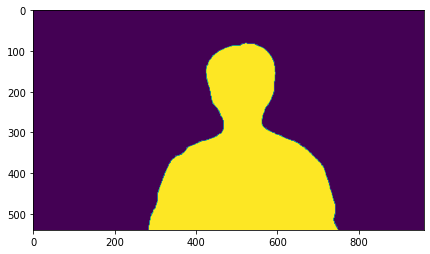

In [14]:
plt.imshow(seg_map)
plt.show()

True, False의 값을 가진 배열도 이미지 출력이 가능합니다.

    cmap = 'gray' 인자를 추가해서 검은색과 흰색으로 표현할 수도 있습니다.
    cmap을 지정하지 않았을 때 보라색과 노란색으로 보이는 이유는 plt.imshow()의 컬러맵 기본값이 'viridis'이기 때문입니다.

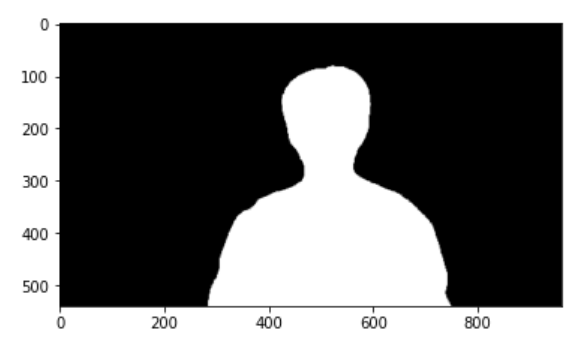

- - -
### 1. 인물 사진 적용하기
- **마스크 추출하기**

In [15]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

img_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

True와 False를 1과 0의 값을 가지게 하고 255를 곱해서 255 또는 0의 값을 가지게 해줍니다.

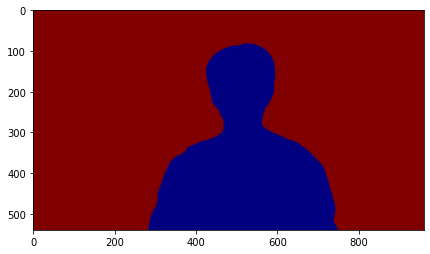

In [16]:
# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

plt.imshow(color_mask)
plt.show()

`cv2.applyColorMap`를 이용해 색상을 변경할 수도 있습니다.

cv2의 색상표 정보는 [여기](https://docs.opencv.org/4.x/d3/d50/group__imgproc__colormap.html#ga9a805d8262bcbe273f16be9ea2055a65)에서 확인할 수 있습니다.

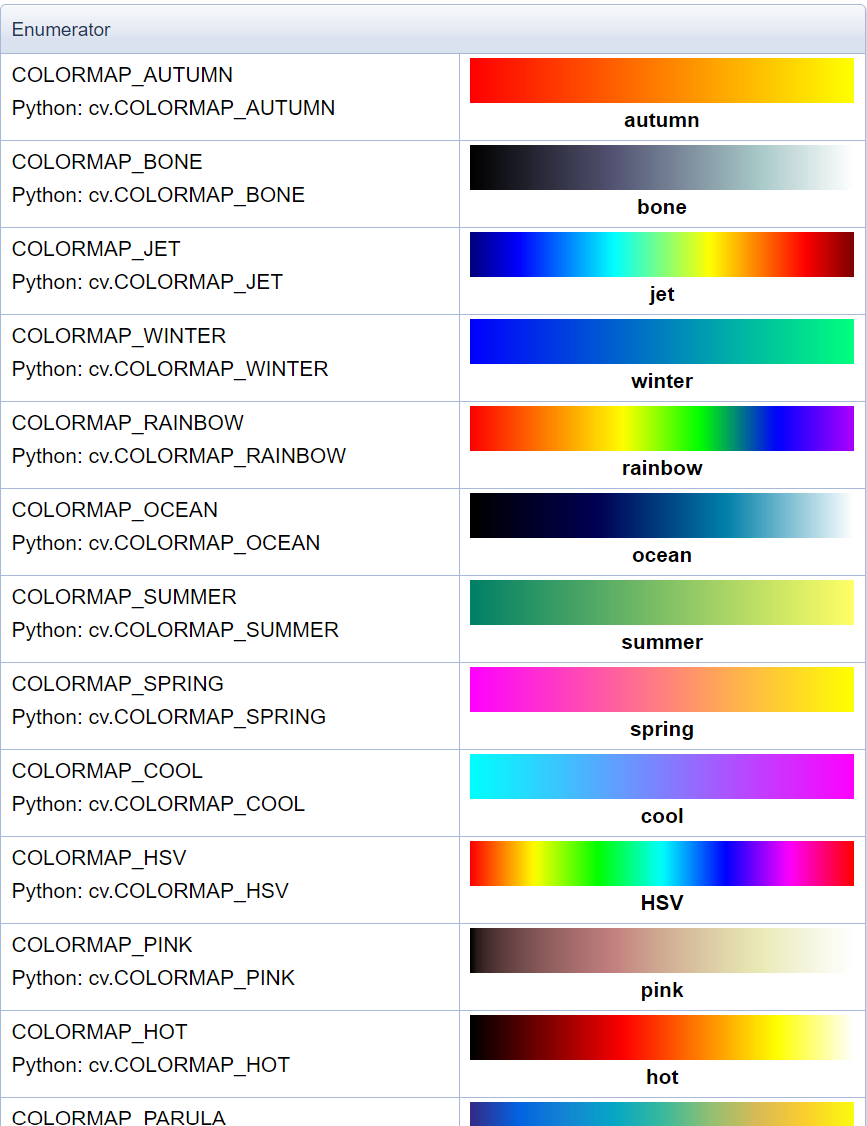

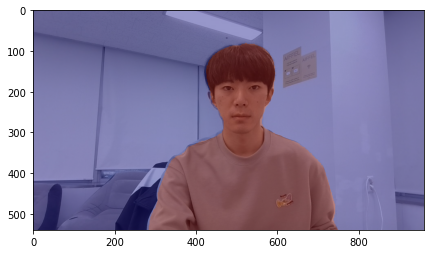

In [17]:
# 원본 이미지와 마스크를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

`cv2.addWeighted`를 이용해 두 이미지를 섞을 수 있습니다.

원본 이미지를 60%만큼 유지하면서 마스크 이미지를 40%만큼 입혀봤습니다.

- - -
### 1. 인물 사진 적용하기
- **블러 효과 입히기**

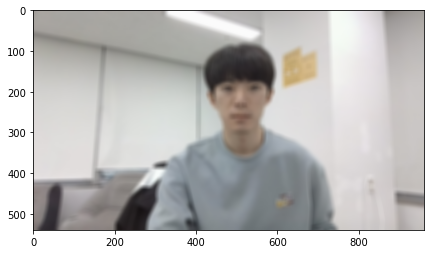

In [18]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13, 13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

`cv2.blur`를 이용하면 이미지에 블러 효과를 넣어줄 수 있습니다.

왠지 원리가 Pooling layer와 비슷할 것 같습니다.

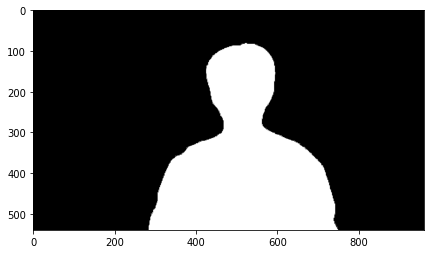

In [19]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

plt.imshow(img_mask_color)
plt.show()

`img_mask`는 0과 255의 값을 가진 배열이였는데요.

`cv2.COLOR_GRAY2BGR`로 검은색과 흰색의 컬러값을 가지도록 변경해줍니다.

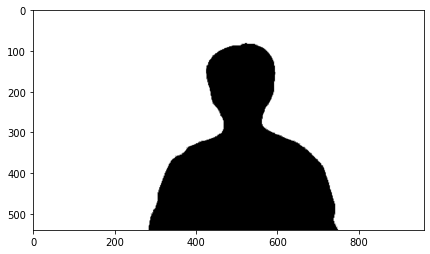

In [20]:
# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

plt.imshow(img_bg_mask)
plt.show()

`cv2.bitwise_not`으로 이미지의 컬러를 반전해줍니다.

반전해주고 나서 배경 부분은 *255*의 값을 가지고 사람 부분은 *0*의 값을 가지게 됐습니다.

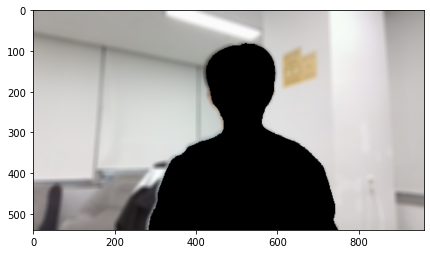

In [21]:
# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

`cv2.bitwise_and`를 이용하면 두 이미지를 합성하는데, 각각의 값에 비트 AND 연산을 취합니다.

마스크 이미지의 배경은 255의 값을 가지고 사람은 0의 값을 가지니

마스크 이미지의 배경 부분은 비트 AND를 해도 원래 이미지 그대로 가져오고

사람 부분은 비트 AND를 하면 원래 이미지가 어떻든 간에 0의 값을 가지게 됩니다.

    255의 2진수 : 11111111
    0의 진수 : 00000000
    
    원래 이미지 10010110 & 마스크 이미지 11111111 = 10010110 각 자리의 수에 AND
    AND =
        (0, 0) : 0
        (1, 0) : 0
        (0, 1) : 0
        (1, 1) : 1
        
    마스크를 온전히 사용하려면 0 또는 255 고정이여야 하는 것 같습니다.

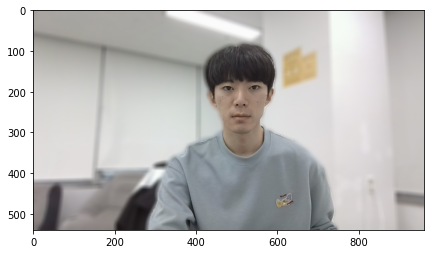

In [22]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

마지막으로 `np.where`을 이용해 검은 부분에 원본 이미지를 입혀주면 인물 사진이 완성됩니다.

- - -
### 2. 인물 사진 함수 만들기

지금까지 한 내용들로 필요한 동작들을 추려서 본격적인 인물 사진 함수를 만들어보도록 하죠.

과정들을 정리하자면

1. 세그멘테이션 모델로 레이블 추출
2. 추출한 세그멘테이션 레이블을 0과 255의 값으로 변경
3. 적용하려는 효과 이미지 추가
4. 효과 이미지 마스킹
5. 마스크 이미지와 원본 합성

정도가 되겠습니다.

In [23]:
def img_masking(img_path, seg_color): # 마스크 이미지 추출 함수
    segvalues, output = model.segmentAsPascalvoc(img_path) # 레이블 분류
    seg_map = np.all(output==seg_color, axis=-1) # 원하는 레이블 추출
    img_mask = seg_map.astype(np.uint8) * 255 # True or False를 형식 변환 후 0 or 255
      
    return img_mask

def img_blur(img, mask, size=(13, 13)): # 인물 사진 함수
    img_blur = cv2.blur(img, size) # 블러 이미지 추가
    img_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR) # 마스크 흰/검 이미지 변환
    img_bg_mask = cv2.bitwise_not(img_mask) # 배경 255, 마스크 0으로 반전
    img_bg_blur = cv2.bitwise_and(img_blur, img_bg_mask) # 블러 이미지에 마스크 부분 추가
    img_concat = np.where(img_mask==255, img, img_bg_blur) # 마스크 부분에 원본 이미지 추가
    
    return cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB) # RGB로 변환해서 return

인물 사진이 아니여도 마스크가 필요한 작업에 유연하게 사용할 수 있도록

마스크 추출 함수는 따로 만들어 줬습니다.

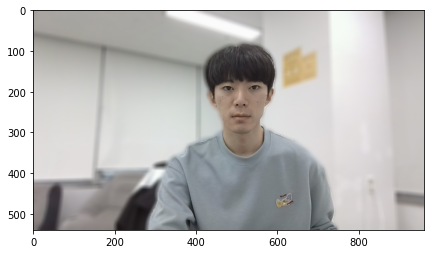

In [24]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

seg_color = (128, 128, 192) # 'person' 레이블의 색상 코드(RGB)

plt.imshow(img_blur(img_orig, img_masking(img_path, seg_color)))
plt.show()

PixelLib에서 제공하는 레이블과 색상 코드를 다시 떠올려서 함수를 잘 실행해줍니다.

인물 사진 처리가 한 줄로 무사히 적용됐군요.

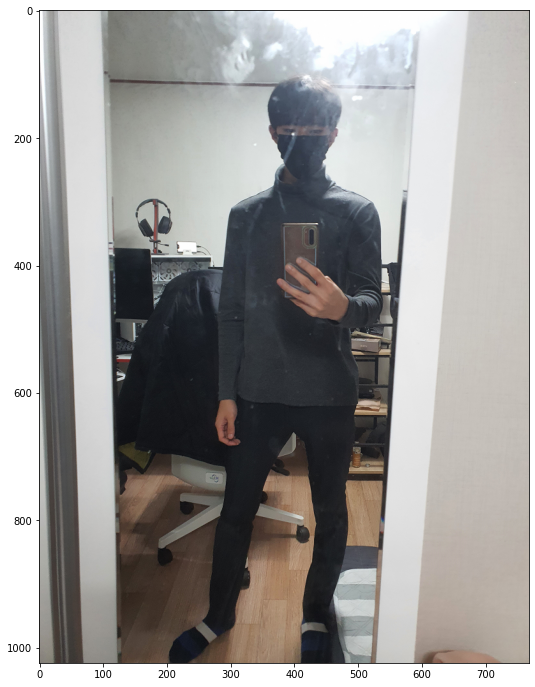

In [25]:
img1_path = os.getenv('HOME') + '/aiffel/EXPLORATION/img/20221015_174347.png'  
img1 = cv2.imread(img1_path)

plt.figure(figsize=(9, 12))
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

다른 사진도 불러와서 적용해보겠습니다.

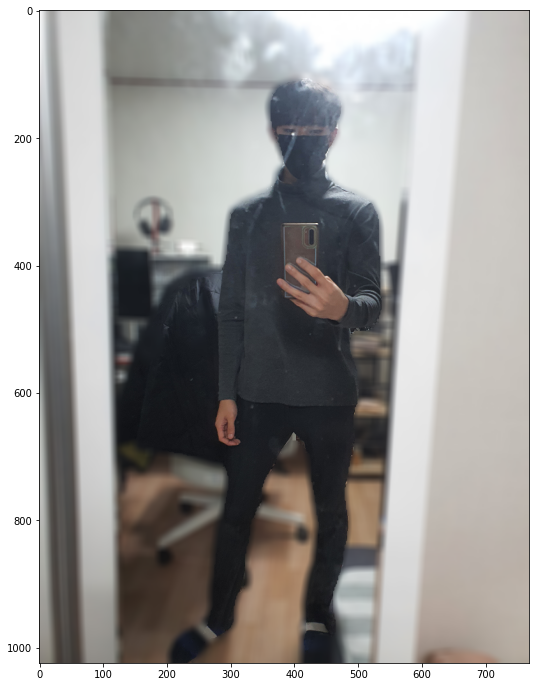

In [26]:
plt.figure(figsize=(9, 12))
plt.imshow(img_blur(img1, img_masking(img1_path, seg_color)))
plt.show()

원래 피사체 심도가 조금이나마 적용되어 있던 사진이라 언뜻 보기엔 잘 적용된 것 같습니다.

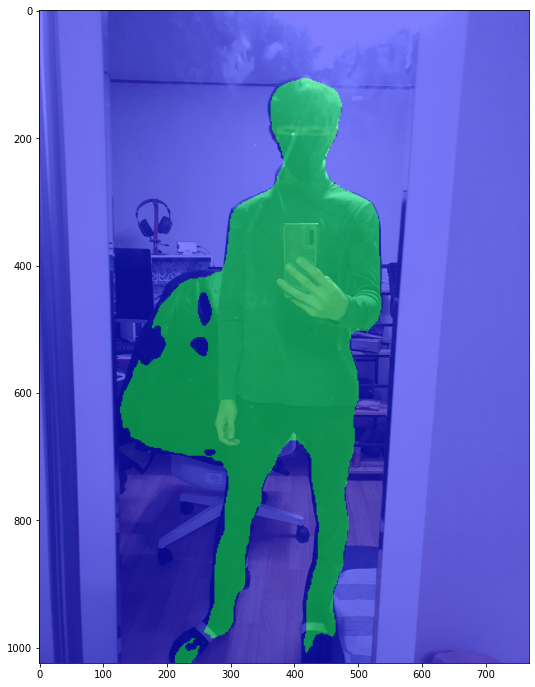

In [27]:
def mask_mix(img, mask, colormap):
    color_mask = cv2.applyColorMap(mask, colormap)
    img_result = cv2.addWeighted(img, 0.5, color_mask, 0.5, 0.0)
    
    return cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(9, 12))
plt.imshow(mask_mix(img1, img_masking(img1_path, seg_color), cv2.COLORMAP_WINTER))
plt.show()

마스크와 색상을 합쳐봤습니다.

손 옆에 있는 의자에 걸린 옷도 사람이라고 분류를 했습니다.

그 외에도 발 부분이 많이 생략되는 등 여러 문제점이 바로 보이는군요.

솔루션은 일단 보류하고 다음 이미지도 실험해보겠습니다.

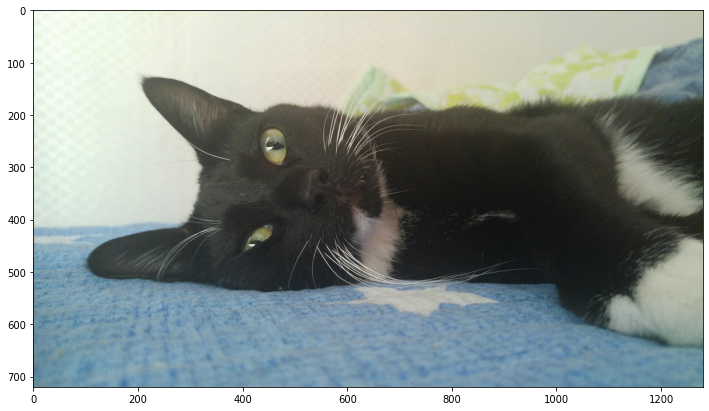

In [28]:
img2_path = os.getenv('HOME') + '/aiffel/EXPLORATION/img/1665906751692.png'  
img2 = cv2.imread(img2_path)

plt.figure(figsize=(12, 9))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

고양이 사진을 준비했습니다.

In [29]:
LABEL_NAMES.index('cat')

8

고양이의 레이블 인덱스는 8입니다.

In [30]:
colormap[8]

array([64,  0,  0])

레이블 8의 색상 코드도 확인해줍니다.

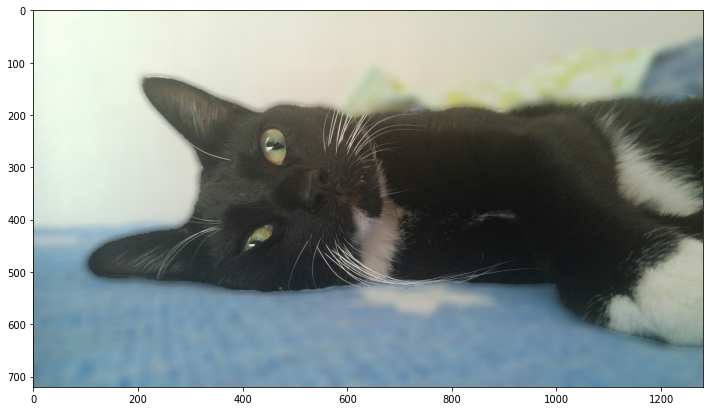

In [31]:
seg_color = (0, 0, 64) # BGR이였던 것을 잊지 맙시다.

plt.figure(figsize=(12, 9))
plt.imshow(img_blur(img2, img_masking(img2_path, seg_color), size=(20, 20)))
plt.show()

인물 사진 모드만 사용하니 식상하군요. ~~(인물도 아닌 게)~~

이번에는 마스크를 이용해 고양이 외의 부분을 다른 이미지로 합성해보겠습니다.

In [32]:
def img_chromakey(img, bg, mask):
    img_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    img_concat = np.where(img_mask==255, img, bg)
    
    return cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB)

크로마키 함수를 만들어줍니다.

마스크 반전 처리가 생략되면서 인물 사진 함수보다 훨씬 간단하게 함수가 만들어졌습니다.

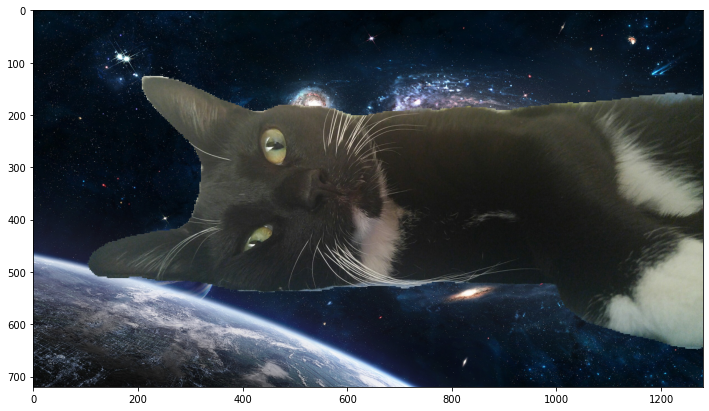

In [33]:
bg_path = os.getenv('HOME') + '/aiffel/EXPLORATION/img/478bd14d363976f0a87c6c34d093ca2e.png' # 배경 이미지를 불러옵니다.
bg = cv2.imread(bg_path)

bg_resize = cv2.resize(bg, (img2.shape[1], img2.shape[0])) # 사이즈를 맞춰주는 것을 잊지 맙시다.

plt.figure(figsize=(12, 9))
plt.imshow(img_chromakey(img2, bg_resize, img_masking(img2_path, seg_color)))
plt.show()

딴 생각에 빠져있는 고양이가 완성됐습니다.

- - -
### 3. 사진에서 문제점 찾기

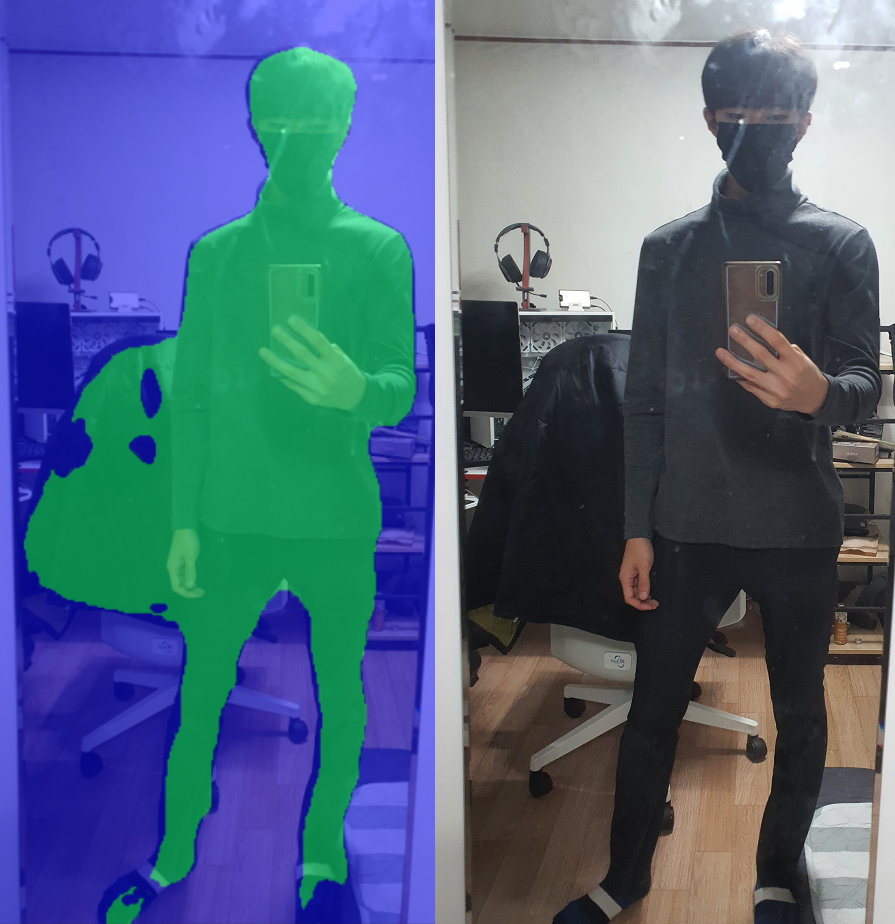

왜 이런 결과가 나왔을까 조금만 고민해봐도

제가 입고 있는 옷과 의자에 걸려있는 옷의 색상이 비슷해서 그렇다는 것을 예상할 수 있습니다.

그렇다면 위 문제를 어떻게 해결해야 할까?  
색상이 문제면 grayscale을 이용해 분류를 하는 방식은 어떨까? 싶어서 실행해봤습니다.

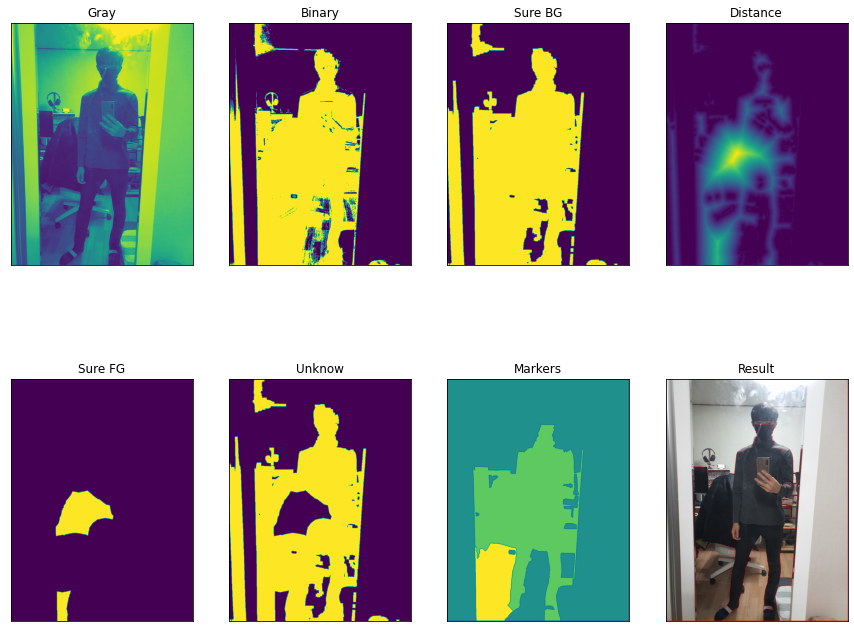

In [34]:
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# binaray image로 변환
gray = cv2.cvtColor(img1_rgb, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#Morphology의 opening, closing을 통해서 노이즈나 Hole제거
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# dilate를 통해서 확실한 Backgroud
sure_bg = cv2.dilate(opening, kernel, iterations=3)

#distance transform을 적용하면 중심으로 부터 Skeleton Image를 얻을 수 있음.
# 즉, 중심으로 부터 점점 옅어져 가는 영상.
# 그 결과에 thresh를 이용하여 확실한 FG를 파악
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255,0)
sure_fg = np.uint8(sure_fg)

# Background에서 Foregrand를 제외한 영역을 Unknow영역으로 파악
unknown = cv2.subtract(sure_bg, sure_fg)

# FG에 Labelling작업
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# watershed를 적용하고 경계 영역에 색지정
markers = cv2.watershed(img1_rgb, markers)
img1_rgb[markers == -1] = [255, 0, 0]

images = [gray, thresh, sure_bg,  dist_transform, sure_fg, unknown, markers, img1_rgb]
titles = ['Gray', 'Binary', 'Sure BG', 'Distance', 'Sure FG', 'Unknow', 'Markers', 'Result']

plt.figure(figsize=(15, 12))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1), plt.imshow(images[i]), plt.title(titles[i]), plt.xticks([]), plt.yticks([])

plt.show()

[Watershed](https://opencv-python.readthedocs.io/en/latest/doc/27.imageWaterShed/imageWaterShed.html) 알고리즘을 이용한 딥러닝 이전의 이미지 분류 방법입니다.

함수에 대해 이해하려고 하진 않고 예시만 참고해 적용해봤습니다.

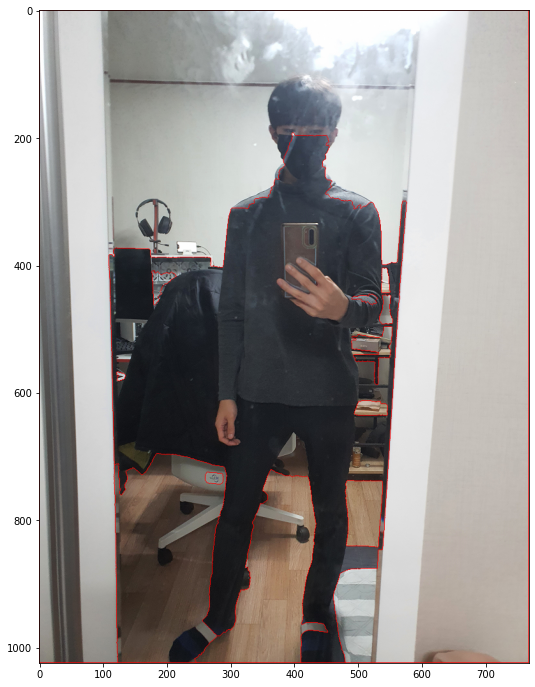

In [35]:
plt.figure(figsize=(9, 12))
plt.imshow(img1_rgb)
plt.show()

분류된 외곽선을 보시면 Watershed 방법으로도 옆에 있는 옷을 따로 구분해내지는 못했습니다.

그래도 전체적인 외곽 포인트는 잘 잡혔는데요. 이전의 방식이 지금의 방식보다 더 좋은걸까요?

지금의 모델은 아마 실행 속도까지 신경을 쓰면서 분류의 정확도와 연산 처리량끼리 타협을 한 것이겠죠.

혹은 위처럼 의자에 걸린 옷을 사람으로 포함해버리는 다른 큰 문제를 억제하기 위해 포기해야 했다거나요.

우리가 먼저 해결해야 할 문제는 의자에 걸린 옷을 따로 구분하는 것입니다.

- - -
### 4. 문제점의 솔루션 제안하기

제가 생각하는 해결 방안은 레이블 속 레이블 분류입니다.

1차로 분류해낸 결과물을 모델의 복잡도를 더해 세분화된 레이블로 다시 분류하는겁니다.

가령 자동차를 분류해냈다면 분류해낸 부분을 그대로 자동차의 문, 바퀴, 범퍼 등으로 분류를 하고,

사람을 분류해냈다면 사람의 머리, 팔, 다리 등으로 다시 분류를 하는겁니다.

세밀하게 분류를 하고 나면 어떤 레이블에도 속하지 않는 부분을 과감하게 버려서  
1차 레이블에 맞는 부분만 포함하도록 모델의 정확도 향상을 기대해볼 수 있다고 생각합니다.

1차 모델의 레이블이 20개가 있었다면 각각의 레이블을 위한 분류 모델이 20개가 준비되어 있어야 하구요.

대신 1차 분류에서 레이블에 포함되는 범위를 넓게 잡아야 하거나 1차 모델의 정확도를 조금 포기해야 할 수도 있겠습니다.



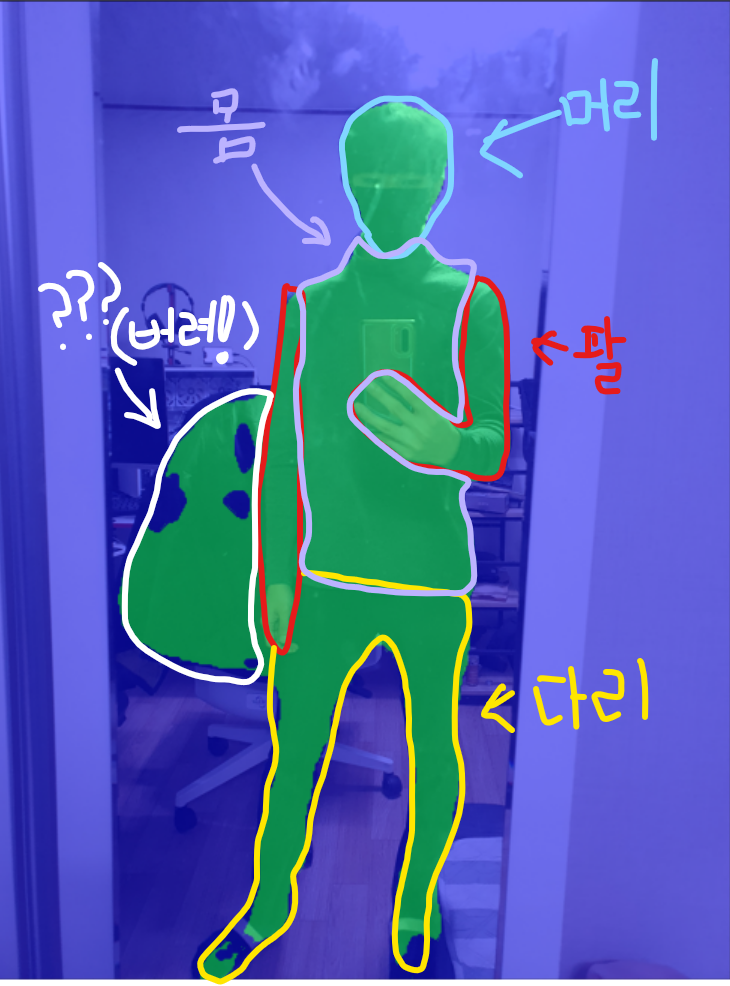

## 마무리하며

최적화의 꽃이라 불리우는 비트 연산자를 처음으로 접해봤습니다.

사실 비트 연산자의 존재 자체도 프로젝트를 작성하면서 알게 됐습니다.

결과적으로 색상 코드를 만들어주는 함수를 이해하지 않고 그냥 지나쳤어도 큰 영향은 없었겠지만

예상 외로 이해하는 데에 투자한 노력과 시간을 배신하진 않은 것 같습니다.

비트 연산자의 작동 원리 자체도 흥미롭게 다가오기도 했구요.

하지만 다른 그루분들이 저처럼 색상 코드 함수를 이해하려고 한다면 차라리 비트 연산법을 보라고 말해주고 싶긴 합니다.

3채널이 아닌 1채널로도 이미지가 출력이 되는 이유는 뭐지?
> 컬러맵이 준비되어 있기 때문입니다.

근데 그게 또 검정색과 흰색이 아닌 이유는 또 뭐지?
> 컬러맵의 기본값이 그렇게 출력하도록 되어있기 때문입니다.

하는 OpenCV를 사용하는 데에 있어서 조금씩 이해가 안갔던 부분들이 이번 프로젝트를 진행하면서 거의 해소된 느낌도 드네요.

제가 제안한 솔루션은 사실 누구나 한 번쯤 생각해볼 만한 솔루션이고,

아직도 사용되지 않는 이유는 해당 방법도 어딘가 치명적인 문제가 있기 때문일거라고 생각합니다.

좀 더 현실적이고 혁신적인 아이디어가 있었다면 좋았을텐데 제 머리 속에서는 도저히 마땅한 아이디어가 떠오르질 않네요.

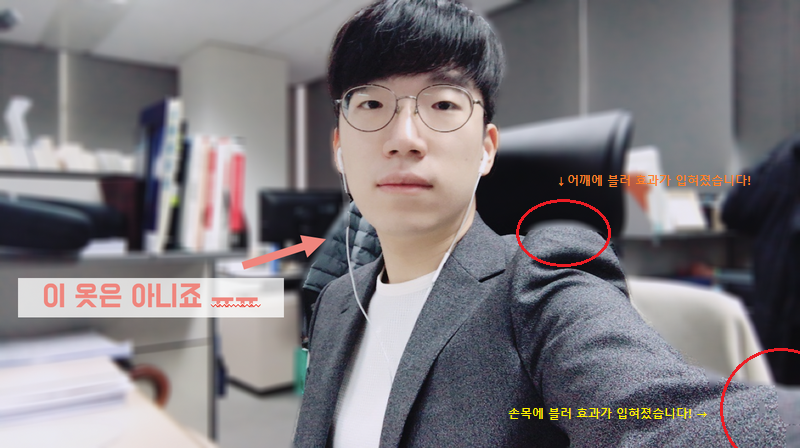